In [5]:
from populations.bbh_models import get_models
import numpy as np

In [6]:
get_models('../OneChannel_Flows/models_reduced.hdf5',['CE'],['mchirp'])

  0%|          | 0/1 [00:00<?, ?it/s]/Users/stormcolloms/opt/anaconda3/envs/amaze/lib/python3.9/site-packages/torch/nn/init.py:405: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")
100%|██████████| 1/1 [00:04<00:00,  4.37s/it]


(['CE/chi00/alpha02',
  'CE/chi00/alpha05',
  'CE/chi00/alpha10',
  'CE/chi00/alpha20',
  'CE/chi00/alpha50',
  'CE/chi01/alpha02',
  'CE/chi01/alpha05',
  'CE/chi01/alpha10',
  'CE/chi01/alpha20',
  'CE/chi01/alpha50',
  'CE/chi02/alpha02',
  'CE/chi02/alpha05',
  'CE/chi02/alpha10',
  'CE/chi02/alpha20',
  'CE/chi02/alpha50',
  'CE/chi05/alpha02',
  'CE/chi05/alpha05',
  'CE/chi05/alpha10',
  'CE/chi05/alpha20',
  'CE/chi05/alpha50'],
 {'CE': <populations.Flowsclass_dev.FlowModel at 0x7fdb42150eb0>})

In [7]:
import pandas as pd
import numpy as np
import h5py

from scipy.special import logit
from scipy.special import expit

def logistic(data,rescaling=False, wholedataset=True, max =1, rescale_max=1):
    if rescaling:
        if wholedataset:
            rescale_max = np.max(data) + 0.01
        else:
            rescale_max = rescale_max
        data /= rescale_max
    else:
        rescale_max = None
    data = logit(data)
    if wholedataset:
        max = np.max(data)
    else:
        max = max
    data /= max
    return([data, max, rescale_max])

def expistic(data, max, rescale_max=None):
    data*=max
    data = expit(data)
    if rescale_max != None:
        data *=rescale_max
    return(data)

def get_model_keys(path):
    alpha_val = '10'
    all_models = []
    models = []
    def find_submodels(name, obj):
        if isinstance(obj, h5py.Dataset):
            all_models.append(name.rsplit('/', 1)[0])
            
    f = h5py.File(path, 'r')
    f.visititems(find_submodels)
    # get all unique models
    all_models = sorted(list(set(all_models)))
    f.close()

    # use only models with given alpha value
    for model in all_models:
        if 'alpha' in model:
            if 'alpha'+alpha_val in model:
                models.append('/'+model)
        else:
            models.append('/' + model)
    return(np.split(np.array(models), 5))

def get_model_keys_CE(path):
    all_models = []
    models = []
    def find_submodels(name, obj):
        if isinstance(obj, h5py.Dataset):
            all_models.append(name.rsplit('/', 1)[0])
            
    f = h5py.File(path, 'r')
    f.visititems(find_submodels)
    # get all unique models
    all_models = sorted(list(set(all_models)))
    f.close()

    # use only models with given alpha value
    for model in all_models:
        if 'CE' in model:
            models.append('/'+model)
    return(np.split(np.array(models), 4))

def read_hdf5(path, all_alpha=False):
    if all_alpha:
        popsynth_outputs = {}
        models = np.asarray(get_model_keys_CE(path))
        for i in range(models.shape[0]):
            for j in range(models.shape[1]):
                popsynth_outputs[i,j]=pd.read_hdf(path, key=models[i,j])
    else:
        popsynth_outputs = {}
        models = np.asarray(get_model_keys(path))
        for i in range(models.shape[0]):
            for j in range(models.shape[1]):
                popsynth_outputs[i,j]=pd.read_hdf(path, key=models[i,j])

    return(popsynth_outputs)

def plot_histogram(model_id, param, axes, models_path):
    popsynth_outputs = read_hdf5(models_path)
    axes.hist(popsynth_outputs[model_id][param])

In [10]:
models_path ='/Users/stormcolloms/Documents/PhD/Project_work/OneChannel_Flows/models_reduced.hdf5'
samples = read_hdf5(models_path, all_alpha=False)

cond_inputs = 1

channel_label = 'SMT'
params = ['mchirp','q', 'chieff', 'z']
no_params = 4

chi_b = [0.,0.1,0.2,0.5]
alpha = [0.2,0.5,1.,2.,5.]


## Test reading in flows

In [8]:
import populations.bbh_models as read_models
from populations.utils.flow import NFlow

In [9]:
channels = ['SMT']
file_path='/Users/stormcolloms/Documents/PhD/Project_work/OneChannel_Flows/models_reduced.hdf5'
params =['mchirp', 'q','chieff', 'z']

flow = read_models.get_models(file_path, channels, params)

100%|██████████| 1/1 [00:01<00:00,  1.74s/it]


In [8]:
print((list(flow.keys())))

AttributeError: 'tuple' object has no attribute 'keys'

In [ ]:
flow_model= flow['SMT']
flow_model.train(lr=0.001, epochs=5, batch_no=5, filename='test_training_SMT.pt')

initialise flow first
(4000000, 6)
4000000
(4000000, 6)
4000000
(4000000, 6)
4000000
(4000000, 6)
4000000
(4000000, 6)
4000000


IndexError: index 11975967 is out of bounds for axis 0 with size 4000000

In [ ]:
flow.load_model('test_training.pt')

## test Sampling 28/6/23

In [9]:
import numpy as np

In [10]:
channels = ['CE','CHE','GC','NSC','SMT']
model_names, kde_models=read_models.get_models(file_path, channels, params, useKDE=True)

100%|██████████| 5/5 [00:11<00:00,  2.21s/it]


In [11]:
print(model_names)

['CE/chi00/alpha02', 'CE/chi00/alpha05', 'CE/chi00/alpha10', 'CE/chi00/alpha20', 'CE/chi00/alpha50', 'CE/chi01/alpha02', 'CE/chi01/alpha05', 'CE/chi01/alpha10', 'CE/chi01/alpha20', 'CE/chi01/alpha50', 'CE/chi02/alpha02', 'CE/chi02/alpha05', 'CE/chi02/alpha10', 'CE/chi02/alpha20', 'CE/chi02/alpha50', 'CE/chi05/alpha02', 'CE/chi05/alpha05', 'CE/chi05/alpha10', 'CE/chi05/alpha20', 'CE/chi05/alpha50', 'CHE/chi00', 'CHE/chi01', 'CHE/chi02', 'CHE/chi05', 'GC/chi00', 'GC/chi01', 'GC/chi02', 'GC/chi05', 'NSC/chi00', 'NSC/chi01', 'NSC/chi02', 'NSC/chi05', 'SMT/chi00', 'SMT/chi01', 'SMT/chi02', 'SMT/chi05']


In [12]:
print((list(kde_models.keys())))

['CE', 'CHE', 'GC', 'NSC', 'SMT']


In [13]:
[x.split('/', 1)[1] for x in model_names]

['chi00/alpha02',
 'chi00/alpha05',
 'chi00/alpha10',
 'chi00/alpha20',
 'chi00/alpha50',
 'chi01/alpha02',
 'chi01/alpha05',
 'chi01/alpha10',
 'chi01/alpha20',
 'chi01/alpha50',
 'chi02/alpha02',
 'chi02/alpha05',
 'chi02/alpha10',
 'chi02/alpha20',
 'chi02/alpha50',
 'chi05/alpha02',
 'chi05/alpha05',
 'chi05/alpha10',
 'chi05/alpha20',
 'chi05/alpha50',
 'chi00',
 'chi01',
 'chi02',
 'chi05',
 'chi00',
 'chi01',
 'chi02',
 'chi05',
 'chi00',
 'chi01',
 'chi02',
 'chi05',
 'chi00',
 'chi01',
 'chi02',
 'chi05']

In [14]:
hyperparam_dict  = {}
hyperidx=0
while hyperidx < Nhyper:
    hyperidx_with_Nhyper = np.argwhere(np.asarray([len(x.split('/')) for x in hyperparams])>hyperidx).flatten()
    hyperparams_at_level = sorted(set([x.split('/')[hyperidx] for x in np.asarray(hyperparams)[hyperidx_with_Nhyper]]))
    hyperparam_dict[hyperidx] = hyperparams_at_level
    hyperidx += 1

NameError: name 'Nhyper' is not defined

In [ ]:
all_models_at_deepest = all([len(x.split('/')[1:])==Nhyper for x in model_names])
while all_models_at_deepest==False:
    # loop until all models have the same length
    for model in model_names:
        # See number of hyperparameters in model, subtract one for channel
        Nhyper_in_model = len(model.split('/'))-1
        # loop until this model has all the hyperparam levels as well
        while Nhyper_in_model < Nhyper:
            model_names.remove(model)
            for new_hyperparam in hyperparam_dict[Nhyper_in_model]:
                # copy the same kde model for the higher hyperparam level
                new_level = model.split('/') + [new_hyperparam]
                # add new model name
                model_names.append(model+'/'+new_hyperparam)
            Nhyper_in_model += 1
        model_names.sort()
    # see if all models are at deepest level else repeat
    all_models_at_deepest = all([len(x.split('/')[1:])==Nhyper for x in model_names])

In [ ]:
hyperparams = list(set([x.split('/', 1)[1] for x in model_names]))
Nhyper = np.max([len(x.split('/')) for x in hyperparams])
channels = sorted(list(set([x.split('/')[0] for x in model_names])))

# construct dict that relates submodels to their index number
submodels_dict = {} #dummy index dict keys:0,1,2,3, items: particular models
ctr=0 #associates with either chi_b or alpha (0 or 1)
while ctr < Nhyper:
    print(hyperparams)
    print(ctr, Nhyper, set([x.split('/')[ctr] for x in hyperparams]))
    submodels_dict[ctr] = {}
    hyper_set = sorted(list(set([x.split('/')[ctr] for x in hyperparams])))
    for idx, model in enumerate(hyper_set): #idx associates with 0,1,2,3,(4) keys
        submodels_dict[ctr][idx] = model
    ctr += 1

['chi05/alpha50', 'chi00/alpha20', 'chi00/alpha10', 'chi01/alpha02', 'chi05/alpha10', 'chi00/alpha05', 'chi02/alpha05', 'chi05/alpha02', 'chi00/alpha50', 'chi01/alpha50', 'chi01/alpha10', 'chi05/alpha05', 'chi01/alpha05', 'chi02/alpha02', 'chi00/alpha02', 'chi02/alpha50', 'chi01/alpha20', 'chi02/alpha20', 'chi05/alpha20', 'chi02/alpha10']
0 2 {'chi01', 'chi00', 'chi02', 'chi05'}
['chi05/alpha50', 'chi00/alpha20', 'chi00/alpha10', 'chi01/alpha02', 'chi05/alpha10', 'chi00/alpha05', 'chi02/alpha05', 'chi05/alpha02', 'chi00/alpha50', 'chi01/alpha50', 'chi01/alpha10', 'chi05/alpha05', 'chi01/alpha05', 'chi02/alpha02', 'chi00/alpha02', 'chi02/alpha50', 'chi01/alpha20', 'chi02/alpha20', 'chi05/alpha20', 'chi02/alpha10']
1 2 {'alpha20', 'alpha10', 'alpha50', 'alpha05', 'alpha02'}


In [ ]:
print(submodels_dict)

{0: {0: 'chi00', 1: 'chi01', 2: 'chi02', 3: 'chi05'}, 1: {0: 'alpha02', 1: 'alpha05', 2: 'alpha10', 3: 'alpha20', 4: 'alpha50'}}


In [ ]:
x=[1.,3.01]
model_list = []
hyperparam_indices = []
for hyper_idx in list(submodels_dict.keys()):
    hyperparam_indices.append(int(np.floor(x[hyper_idx])))
    model_list.append(submodels_dict[hyper_idx][int(np.floor(x[hyper_idx]))])


In [ ]:
print(hyperparam_indices, model_list)

[1, 3] ['chi01', 'alpha20']


## Testing Likelihood call

In [ ]:
label='SMT'
cond_inputs =2
hps = [[0.,0.1,0.2,0.5]]
if label=='CE':
    hps.append([0.2,0.5,1.,2.,5.])
else:
    hps.append([1])
conditional_hp_idxs = [1,3]

conditional_hps = []
ctr=0 #associates with either chi_b or alpha (0 or 1)
for i in range(cond_inputs):
    conditional_hps.append(hps[i][conditional_hp_idxs[i]])

conditional_hps = np.asarray(conditional_hps)
print(conditional_hps)

[0.1 2. ]


In [ ]:
filepath = 'Users/storm/'
channel = 'CE'
print(np.dtype(f'{filepath}{channel}_mappings.npy'))

TypeError: data type 'Users/storm/CE_mappings.npy' not understood

## Reading in GW data - hdf format

In [ ]:
from populations import bbh_models, gw_obs
params = ['mchirp', 'q','chieff','z']
observations, obsdata, p_theta, events = gw_obs.generate_observations(params, '/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/gw_events', \
                                            100, 'delta', None)

In [ ]:
print(np.shape(observations))


(46, 4)


In [ ]:
print(np.shape(obsdata))

(46, 1, 4)


In [ ]:
import numpy as np
for channel in ['CE', 'CHE', 'GC', 'NSC', 'SMT']:
    mappings = np.load(f'/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/flow_models/{channel}_mappings.npy', allow_pickle=True)
    print(mappings)

[8.232875920000927 37.6363925625166 13.347090269689224 None
 6.907754476512362 10.009991975305043]
[8.24779881822069 38.20209787230986 14.019699977622743 None
 6.907574735059984 10.008194723749112]
[8.84889295963338 69.67672312100156 4.605170185988091 None
 6.8932658118193295 9.86615]
[9.121187841457722 91.48060423467516 9.049909624455028 None
 6.482990596650801 6.549236468139789]
[8.23212672756918 37.608213710983236 11.735077792414073 None
 6.9072589617804185 10.005038059432552]


## Timing log_prob

In [5]:
import time
from populations import gw_obs, bbh_models
x = np.random.rand(100,4)
params = ['mchirp', 'q','chieff','z']
channels = ['CE', 'CHE', 'GC', 'NSC', 'SMT']
observations, obsdata, p_theta, events = gw_obs.generate_observations(params, '/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/gw_events', \
                                            100, 'posteriors', None)
model_names, pop_models = bbh_models.get_models('/Users/stormcolloms/Documents/PhD/Project_work/OneChannel_Flows/models_reduced.hdf5', channels, params, use_flows=True,detectable=False)
#TO CHANGE - add detectable models?
model_names.sort()
hyperparams = sorted(list(set([x.split('/', 1)[1] for x in model_names])))
Nhyper = np.max([len(x.split('/')) for x in hyperparams])
submodels_dict = {} #dummy index dict keys:0,1,2,3, items: particular models

# create dict for the hyperparameters at each level
hyperparam_dict  = {}
hyperidx=0
while hyperidx < Nhyper:
    hyperidx_with_Nhyper = np.argwhere(np.asarray([len(x.split('/')) for x in hyperparams])>hyperidx).flatten()
    hyperparams_at_level = sorted(set([x.split('/')[hyperidx] for x in np.asarray(hyperparams)[hyperidx_with_Nhyper]]))
    hyperparam_dict[hyperidx] = hyperparams_at_level
    hyperidx += 1
    
all_models_at_deepest = all([len(x.split('/')[1:])==Nhyper for x in model_names])
while all_models_at_deepest==False:
    # loop until all models have the same length
    for model in model_names:
        # See number of hyperparameters in model, subtract one for channel
        Nhyper_in_model = len(model.split('/'))-1
        # loop until this model has all the hyperparam levels as well
        while Nhyper_in_model < Nhyper:
            model_names.remove(model)
            for new_hyperparam in hyperparam_dict[Nhyper_in_model]:
                # add new model name
                model_names.append(model+'/'+new_hyperparam)
            Nhyper_in_model += 1
        model_names.sort()
    # see if all models are at deepest level else repeat
    all_models_at_deepest = all([len(x.split('/')[1:])==Nhyper for x in model_names])


100%|██████████| 5/5 [00:11<00:00,  2.39s/it]


IndexError: list index out of range

In [ ]:
ctr=0 #associates with either chi_b or alpha (0 or 1)
while ctr < Nhyper:
    submodels_dict[ctr] = {}
    hyper_set = sorted(list(set([x.split('/')[ctr] for x in hyperparams])))
    for idx, model in enumerate(hyper_set): #idx associates with 0,1,2,3,(4) keys
        submodels_dict[ctr][idx] = model
    ctr += 1

In [ ]:

start = time.time()

## Mapping all observations at once

In [11]:
from populations.Flowsclass_dev import FlowModel
from populations import gw_obs
import torch

In [12]:
popsynth_outputs = read_hdf5(file_path, 'CE')
flow = FlowModel.from_samples('CE', popsynth_outputs, params)

gw_path = '/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/gw_events'
observations, obsdata, p_theta, events = gw_obs.generate_observations(params, gw_path, \
                                            100, 'posteriors', None)
flow.load_model('/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/flow_models/', 'CE')

In [13]:
mappedobs = np.asarray(flow.map_obs(obsdata))

In [14]:
conditional_hps = [0.3,1]
tileconds = np.repeat([conditional_hps],np.shape(mappedobs)[1], axis=0)
tileconds = np.repeat([tileconds],np.shape(mappedobs)[0], axis=0)
print(np.shape(tileconds))

(46, 100, 2)


In [22]:
sample = torch.from_numpy(mappedobs.astype(np.float32))
hyperparams = torch.from_numpy(tileconds.astype(np.float32))
shape = sample.shape
#flatten samples given they are have dimensions Nsampels x Nobs x Nparams
sample = torch.flatten(sample, start_dim=0, end_dim=1)

In [23]:
sample = torch.reshape(sample, shape)

In [24]:
sample.shape

torch.Size([46, 100, 4])

## Calculating likelihoods

In [60]:
import matplotlib.pyplot as plt
import corner as corner

popsynth_outputs = read_hdf5(file_path, 'CE')
flow = FlowModel.from_samples('CE', popsynth_outputs, params)

gw_path = '/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/gw_events'
observations, obsdata, p_theta, events = gw_obs.generate_observations(params, gw_path, \
                                            100, 'posteriors', None)
flow.load_model('/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/flow_models/', 'CE')

In [82]:
param_bounds = np.array([[0,100], [0,1], [-1,1], [0,10]])
obs = np.random.rand(2,2,4)
obs[:,:,0] *=param_bounds[0,1]
obs[:,:,1] *=param_bounds[1,1]
obs[:,:,2] -= 0.5
obs[:,:,2] *=param_bounds[2,1]*2
obs[:,:,3] *=param_bounds[3,1]

In [83]:
obs

array([[[77.18794326,  0.36842467,  0.3286523 ,  7.50173753],
        [17.24239769,  0.59456911, -0.31291476,  5.94377058]],

       [[88.89032035,  0.09901725, -0.09611462,  3.16160004],
        [ 8.13692194,  0.88360498, -0.61622354,  6.20886912]]])

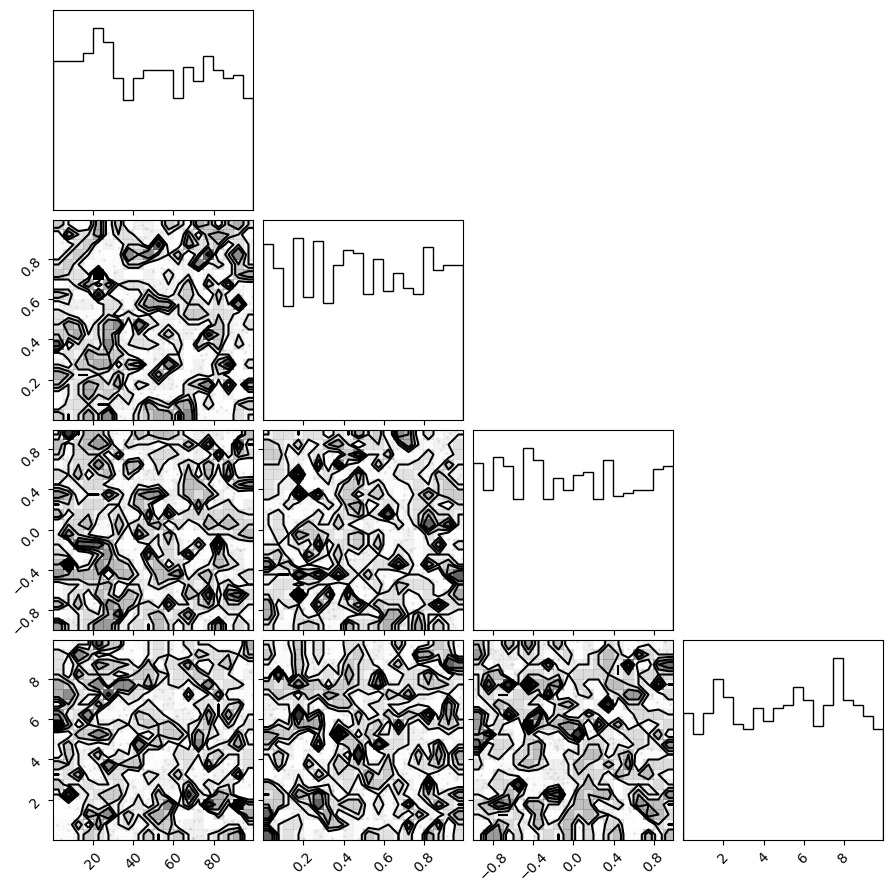

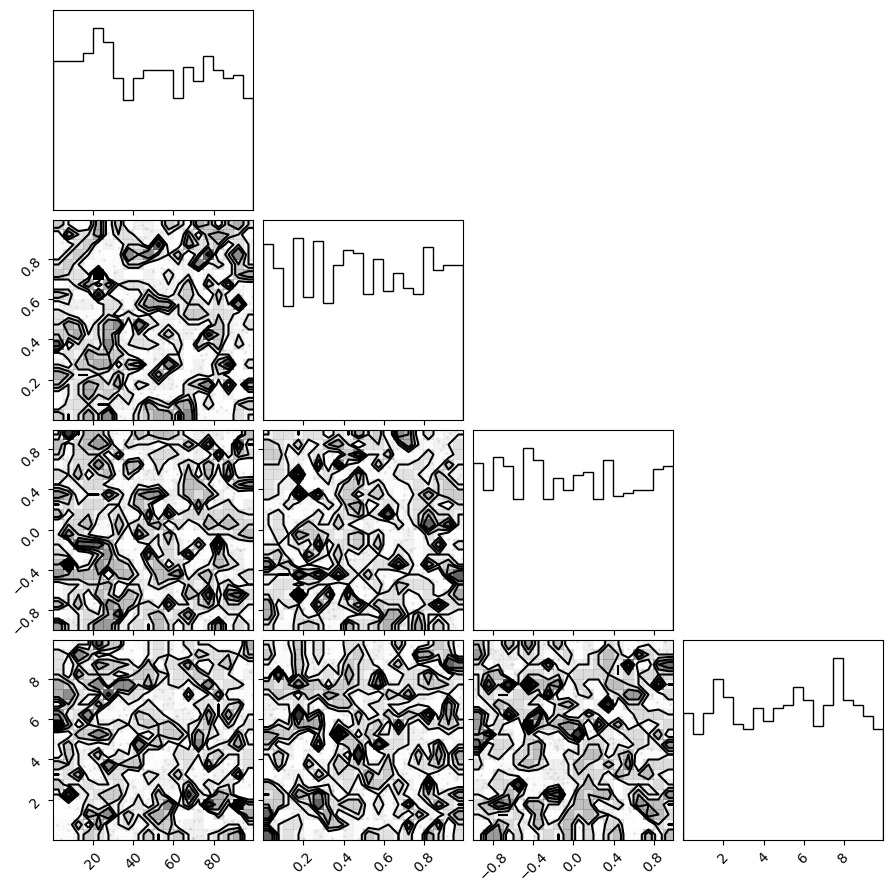

In [69]:
#check the mock observations
corner.corner(obs)

In [84]:
likelihoods = flow(obs,[3,1])

TypeError: get_logprob() takes 3 positional arguments but 4 were given